In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

DATA_PATH = "data/processed/support_tickets_analytics.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["issue_created", "issue_resolution_date"])

df.shape, df.head()

((66691, 9),
         id             issue_created     issue_resolution_date issue_type  \
 0  11887.0 2016-01-06 08:23:43+00:00 2016-01-06 08:56:55+00:00     Ticket   
 1  11890.0 2016-01-11 10:06:19+00:00 2016-01-12 12:30:23+00:00     Ticket   
 2  11904.0 2016-01-21 07:28:20+00:00 2016-01-26 08:21:47+00:00     Ticket   
 3  11907.0 2016-01-26 07:44:54+00:00 2016-01-26 07:45:48+00:00   Vacation   
 4  11912.0 2016-02-01 13:45:47+00:00 2016-02-07 06:21:42+00:00      Story   
 
   issue_status priority_norm  resolution_hours_capped  sla_breach  \
 0         done        Medium                 0.553333           0   
 1         done        Medium                26.401111           0   
 2         done        Medium               120.890833           1   
 3         done        Medium                 0.015000           0   
 4         done        Medium               136.598611           1   
 
    reassignment_count  
 0                   0  
 1                   0  
 2                  

In [2]:
def sla_breach_rate(data):
    valid = data[data["resolution_hours_capped"].notna()]
    return valid["sla_breach"].mean()

C:\Users\immuk\AppData\Local\Temp\ipykernel_22168\1373672936.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week"] = df["issue_created"].dt.to_period("W").dt.start_time


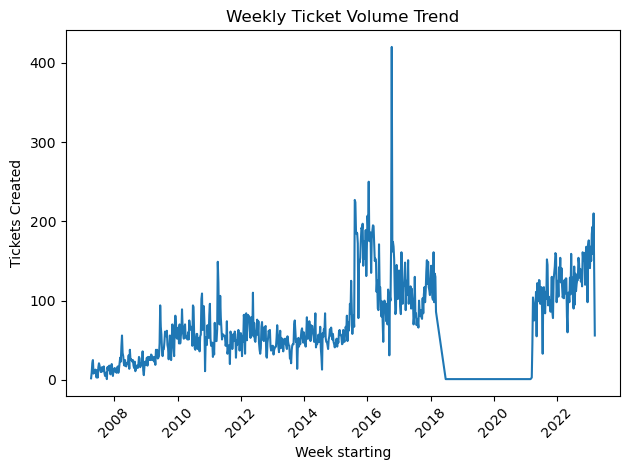

In [13]:
df["week"] = df["issue_created"].dt.to_period("W").dt.start_time

weekly_volume = (
    df.groupby("week")
      .size()
      .reset_index(name="ticket_count")
)

plt.figure()
plt.plot(weekly_volume["week"], weekly_volume["ticket_count"])
plt.title("Weekly Ticket Volume Trend")
plt.xlabel("Week starting")
plt.ylabel("Tickets Created")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

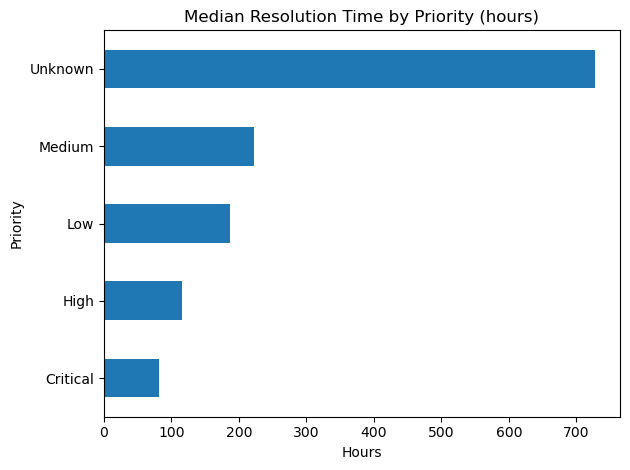

In [4]:
priority_stats = (
    df[df["resolution_hours_capped"].notna()]
    .groupby("priority_norm")["resolution_hours_capped"]
    .median()
    .sort_values()
)

plt.figure()
priority_stats.plot(kind="barh")
plt.title("Median Resolution Time by Priority (hours)")
plt.xlabel("Hours")
plt.ylabel("Priority")
plt.tight_layout()
plt.show()

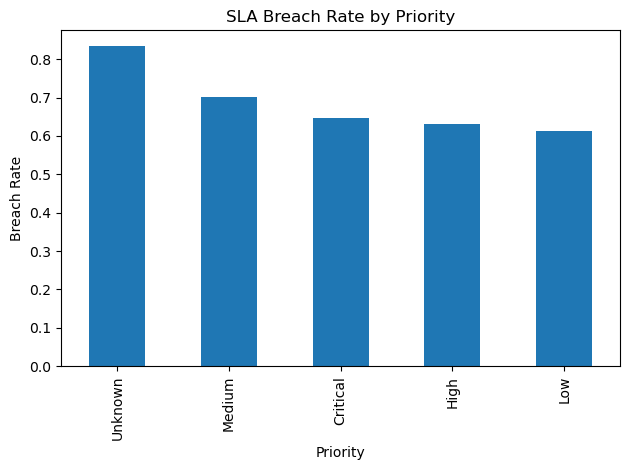

In [5]:
sla_by_priority = (
    df[df["resolution_hours_capped"].notna()]
    .groupby("priority_norm")["sla_breach"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
sla_by_priority.plot(kind="bar")
plt.title("SLA Breach Rate by Priority")
plt.ylabel("Breach Rate")
plt.xlabel("Priority")
plt.tight_layout()
plt.show()

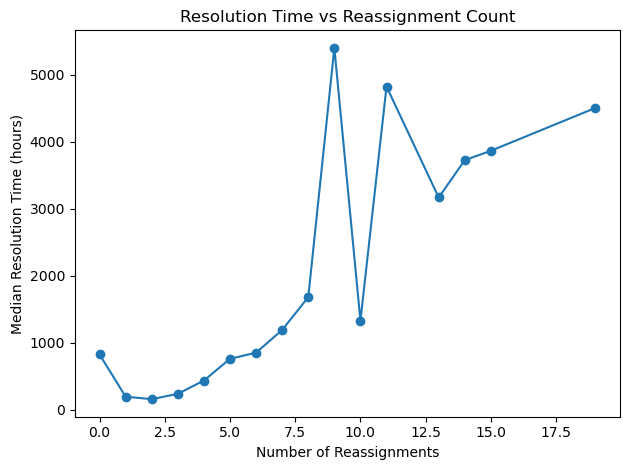

In [6]:
reassign_analysis = (
    df[df["resolution_hours_capped"].notna()]
    .groupby("reassignment_count")["resolution_hours_capped"]
    .median()
)

plt.figure()
reassign_analysis.plot(marker="o")
plt.title("Resolution Time vs Reassignment Count")
plt.xlabel("Number of Reassignments")
plt.ylabel("Median Resolution Time (hours)")
plt.tight_layout()
plt.show()

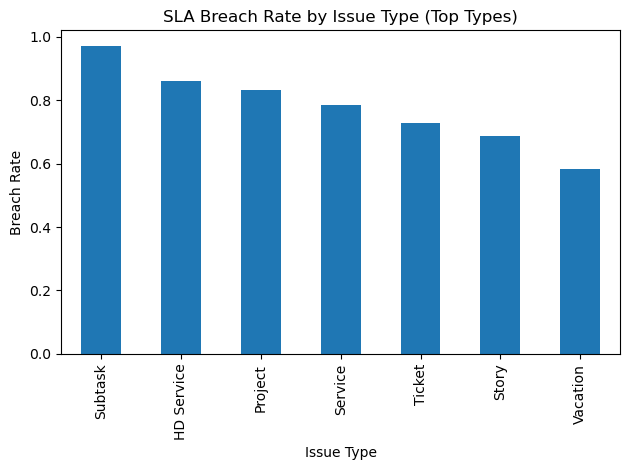

In [7]:
top_types = df["issue_type"].value_counts().head(8).index

type_sla = (
    df[df["issue_type"].isin(top_types) & df["resolution_hours_capped"].notna()]
    .groupby("issue_type")["sla_breach"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
type_sla.plot(kind="bar")
plt.title("SLA Breach Rate by Issue Type (Top Types)")
plt.ylabel("Breach Rate")
plt.xlabel("Issue Type")
plt.tight_layout()
plt.show()

In [12]:
# Overall SLA breach rate (resolved only)
resolved = df[df["resolution_hours_capped"].notna()]
overall_breach = resolved["sla_breach"].mean()

# SLA breach by priority
breach_by_priority = (resolved.groupby("priority_norm")["sla_breach"].mean()
                      .sort_values(ascending=False))

# Median resolution by priority
median_res_by_priority = (resolved.groupby("priority_norm")["resolution_hours_capped"].median()
                          .sort_values(ascending=False))

# Reassignment impact (median resolution by reassignment count)
median_res_by_reassign = (resolved.groupby("reassignment_count")["resolution_hours_capped"].median()
                          .sort_index())

print("Overall SLA breach rate (resolved only):", round(overall_breach, 3))
print("\nBreach rate by priority:\n", breach_by_priority.round(3))
print("\nMedian resolution hours by priority:\n", median_res_by_priority.round(1))
print("\nMedian resolution hours by reassignment count:\n", median_res_by_reassign.round(1))

Overall SLA breach rate (resolved only): 0.732

Breach rate by priority:
 priority_norm
Unknown     0.833
Medium      0.701
Critical    0.647
High        0.631
Low         0.612
Name: sla_breach, dtype: float64

Median resolution hours by priority:
 priority_norm
Unknown     728.1
Medium      222.2
Low         186.6
High        115.8
Critical     81.7
Name: resolution_hours_capped, dtype: float64

Median resolution hours by reassignment count:
 reassignment_count
0      823.4
1      193.0
2      156.1
3      235.8
4      433.6
5      758.6
6      850.2
7     1189.7
8     1679.4
9     5402.1
10    1326.3
11    4824.9
13    3167.8
14    3725.4
15    3865.5
19    4504.6
Name: resolution_hours_capped, dtype: float64
